In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')

# Drop the ID column
df.drop(columns=["Id"], inplace=True)

# Encode Species (target)
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])  # setosa=0, versicolor=1, virginica=2

df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X = df.drop("Species", axis=1)
y = df["Species"]

# Train-Test split (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Try different values of K
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k} → Accuracy: {acc:.2f}")


K = 1 → Accuracy: 1.00
K = 2 → Accuracy: 1.00
K = 3 → Accuracy: 1.00
K = 4 → Accuracy: 1.00
K = 5 → Accuracy: 1.00
K = 6 → Accuracy: 1.00
K = 7 → Accuracy: 1.00
K = 8 → Accuracy: 1.00
K = 9 → Accuracy: 1.00
K = 10 → Accuracy: 1.00


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


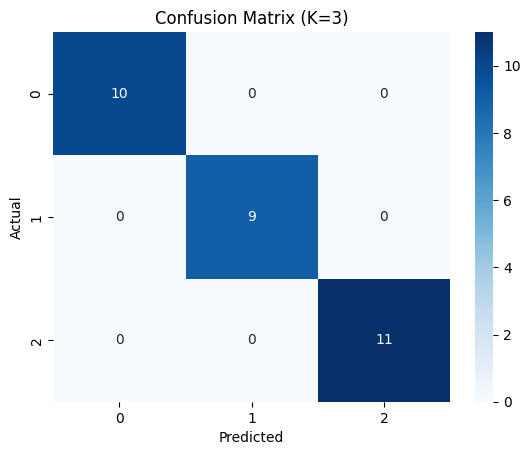

In [5]:
# Final KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.title("Confusion Matrix (K=3)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


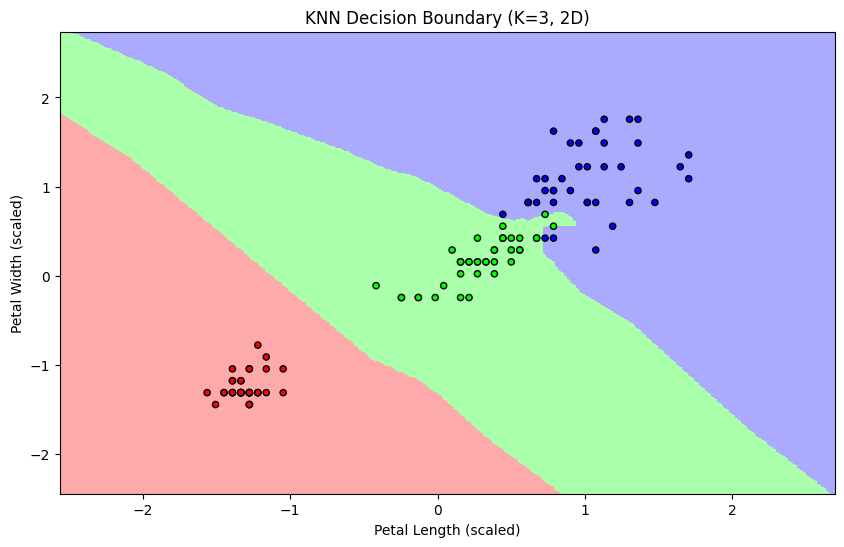

In [6]:
# Select only 2 features for plotting
X2 = df[["PetalLengthCm", "PetalWidthCm"]].values
y2 = df["Species"]

# Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Normalize
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

# KNN on 2D features
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X2_train_scaled, y2_train)

# Plot decision boundary
from matplotlib.colors import ListedColormap

h = .02  # step size
x_min, x_max = X2_train_scaled[:, 0].min() - 1, X2_train_scaled[:, 0].max() + 1
y_min, y_max = X2_train_scaled[:, 1].min() - 1, X2_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X2_train_scaled[:, 0], X2_train_scaled[:, 1], c=y2_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("KNN Decision Boundary (K=3, 2D)")
plt.show()
